Create a preliminary list that narrows down the potentially useful variables from hundreds to a few.

In [83]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

In [74]:
#Get the file to do logistic regression on

#import CSV file
featurefile = 'coltest.csv'
df = pd.read_csv(featurefile)

#replace infs and nands so that everything is numbers
df.replace([np.inf, -np.inf, np.nan], 0, inplace=True)

#Create new separation columns
df['sephap'] = df['emotion'].apply(lambda x: 0 if x in ['ANG', 'SAD'] else 1)
df['sepang'] = df['emotion'].apply(lambda x: 0 if x in ['SAD', 'HAP'] else 1)
df['sepsad'] = df['emotion'].apply(lambda x: 0 if x in ['ANG', 'HAP'] else 1)

#print(df)

In [75]:
#one example:

X = sm.add_constant(df['duration'])
# Fit logistic regression model

model = sm.Logit(df['sephap'], X)
result = model.fit()

# P-value
pval = result.pvalues
print(result.summary(), pval, pval[1])

Optimization terminated successfully.
         Current function value: 0.630121
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 sephap   No. Observations:                 2533
Model:                          Logit   Df Residuals:                     2531
Method:                           MLE   Df Model:                            1
Date:                Sun, 12 May 2024   Pseudo R-squ.:                0.004683
Time:                        13:24:23   Log-Likelihood:                -1596.1
converged:                       True   LL-Null:                       -1603.6
Covariance Type:            nonrobust   LLR p-value:                 0.0001065
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3720      0.100     -3.717      0.000      -0.568      -0.176
duration      -0.1343      0.

In [76]:
def getpval(ycol, xcol):
    #ycol is the separation we're looking for. xcol is the feature to use to try to separate
    X = sm.add_constant(df[xcol])
    # Fit logistic regression model
    model = sm.Logit(df[ycol], X)
    result = model.fit()
    return result.pvalues[1]
    #returns P-value for variable/separation combo

In [90]:
#run the whole csv through the function to see which features are useful at which separations
pvdf = pd.DataFrame()

separations = ['sephap', 'sepsad', 'sepang']

for sep in separations:
    for column in df.columns:
        if df[column].dtype == 'O':
        #skip the string columns
            dummy=0
        elif column.startswith('sep'):
            #we're done
            dummy=0
        elif df[column].nunique() == 1:
            #skip columns where all values are the same
            dummy=0
        else:
            print(column)
            thisp = getpval(sep, column)
            thisframe = pd.DataFrame(data=np.array([(sep, column, float(thisp))]), columns=['septype', 'feature', 'pvalue']) 
            pvdf = pvdf.append(thisframe, ignore_index=True)
        

bit_depth
Optimization terminated successfully.
         Current function value: 0.633086
         Iterations 4
duration
Optimization terminated successfully.
         Current function value: 0.630121
         Iterations 5
syllabic_rate
Optimization terminated successfully.
         Current function value: 0.631012
         Iterations 5
zcr_mean
Optimization terminated successfully.
         Current function value: 0.629564
         Iterations 5
zcr_std
Optimization terminated successfully.
         Current function value: 0.629308
         Iterations 5
zcr_frequncy
Optimization terminated successfully.
         Current function value: 0.631064
         Iterations 5
mean_spectral_envelope
Optimization terminated successfully.
         Current function value: 0.630995
         Iterations 5
median_spectral_envelope
Optimization terminated successfully.
         Current function value: 0.632489
         Iterations 5
min_spectral_envelope
Optimization terminated successfully.
         Curr

zcr_stds_diffs_from_average3_4
Optimization terminated successfully.
         Current function value: 0.632952
         Iterations 5
frequncys_zcr
Optimization terminated successfully.
         Current function value: 0.631064
         Iterations 5
zcr_frequncys_from_average0
Optimization terminated successfully.
         Current function value: 0.633086
         Iterations 4
zcr_frequncys_from_average1
Optimization terminated successfully.
         Current function value: 0.633086
         Iterations 4
zcr_frequncys_from_average2
Optimization terminated successfully.
         Current function value: 0.633086
         Iterations 4
zcr_frequncys_from_average3
Optimization terminated successfully.
         Current function value: 0.633086
         Iterations 4
syllabic_rate_0
Optimization terminated successfully.
         Current function value: 0.631064
         Iterations 5
syllabic_rate_1
Optimization terminated successfully.
         Current function value: 0.630442
         Iteratio

chroma11_0
Optimization terminated successfully.
         Current function value: 0.631102
         Iterations 5
chroma12_0
Optimization terminated successfully.
         Current function value: 0.624775
         Iterations 5
max_amp_short_1
Optimization terminated successfully.
         Current function value: 0.632870
         Iterations 5
min_amp_short_1
Optimization terminated successfully.
         Current function value: 0.633031
         Iterations 4
mean_amp_short_1
Optimization terminated successfully.
         Current function value: 0.631645
         Iterations 6
med_amp_short_1
Optimization terminated successfully.
         Current function value: 0.631184
         Iterations 5
magmax_short_1
Optimization terminated successfully.
         Current function value: 0.624777
         Iterations 6
maxpf_short_1
Optimization terminated successfully.
         Current function value: 0.633076
         Iterations 4
maxf_items_short_1
Optimization terminated successfully.
         Cu

n2_short_3
Optimization terminated successfully.
         Current function value: 0.626767
         Iterations 5
n3_short_3
Optimization terminated successfully.
         Current function value: 0.633086
         Iterations 4
n4_short_3
Optimization terminated successfully.
         Current function value: 0.633001
         Iterations 4
maxpf_short/maxpf_short_3
Optimization terminated successfully.
         Current function value: 0.633049
         Iterations 4
maxf_items_short/maxf_items_short_3
Optimization terminated successfully.
         Current function value: 0.632987
         Iterations 5
chroma01_3
Optimization terminated successfully.
         Current function value: 0.623329
         Iterations 5
chroma02_3
Optimization terminated successfully.
         Current function value: 0.626217
         Iterations 5
chroma03_3
Optimization terminated successfully.
         Current function value: 0.631737
         Iterations 5
chroma04_3
Optimization terminated successfully.
       

Optimization terminated successfully.
         Current function value: 0.630424
         Iterations 5
maxpf_short_1_grad
Optimization terminated successfully.
         Current function value: 0.633022
         Iterations 5
maxpf_short_2_diff
Optimization terminated successfully.
         Current function value: 0.633075
         Iterations 4
maxpf_short_2_grad
Optimization terminated successfully.
         Current function value: 0.632901
         Iterations 5
maxpf_short_3_diff
Optimization terminated successfully.
         Current function value: 0.632666
         Iterations 5
maxpf_short_3_grad
Optimization terminated successfully.
         Current function value: 0.632990
         Iterations 4
maxf_items_short_0_diff
Optimization terminated successfully.
         Current function value: 0.630125
         Iterations 5
maxf_items_short_0_grad
Optimization terminated successfully.
         Current function value: 0.631495
         Iterations 5
maxf_items_short_1_diff
Optimization term

Optimization terminated successfully.
         Current function value: 0.632880
         Iterations 5
maxsumf_short/meancent_short_0_diff
Optimization terminated successfully.
         Current function value: 0.604667
         Iterations 5
maxsumf_short/meancent_short_0_grad
Optimization terminated successfully.
         Current function value: 0.633017
         Iterations 4
maxsumf_short/meancent_short_1_diff
Optimization terminated successfully.
         Current function value: 0.632699
         Iterations 5
maxsumf_short/meancent_short_1_grad
Optimization terminated successfully.
         Current function value: 0.632415
         Iterations 6
maxsumf_short/meancent_short_2_diff
Optimization terminated successfully.
         Current function value: 0.633036
         Iterations 4
maxsumf_short/meancent_short_2_grad
Optimization terminated successfully.
         Current function value: 0.633025
         Iterations 4
maxsumf_short/meancent_short_3_diff
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.630469
         Iterations 5
chroma05_3_diff
Optimization terminated successfully.
         Current function value: 0.633012
         Iterations 4
chroma05_3_grad
Optimization terminated successfully.
         Current function value: 0.631672
         Iterations 5
chroma06_0_diff
Optimization terminated successfully.
         Current function value: 0.627802
         Iterations 5
chroma06_0_grad
Optimization terminated successfully.
         Current function value: 0.620499
         Iterations 6
chroma06_1_diff
Optimization terminated successfully.
         Current function value: 0.596834
         Iterations 5
chroma06_1_grad
Optimization terminated successfully.
         Current function value: 0.602543
         Iterations 5
chroma06_2_diff
Optimization terminated successfully.
         Current function value: 0.631637
         Iterations 5
chroma06_2_grad
Optimization terminated successfully.
         Current f

mfccs_std_5
Optimization terminated successfully.
         Current function value: 0.577903
         Iterations 6
mfccs_std_6
Optimization terminated successfully.
         Current function value: 0.623602
         Iterations 5
mfccs_std_7
Optimization terminated successfully.
         Current function value: 0.626963
         Iterations 5
mfccs_std_8
Optimization terminated successfully.
         Current function value: 0.598142
         Iterations 5
mfccs_std_9
Optimization terminated successfully.
         Current function value: 0.627620
         Iterations 5
mfccs_std_10
Optimization terminated successfully.
         Current function value: 0.612881
         Iterations 5
mfccs_std_11
Optimization terminated successfully.
         Current function value: 0.577616
         Iterations 6
mfccs_std_12
Optimization terminated successfully.
         Current function value: 0.578522
         Iterations 6
zcr_means_0
Optimization terminated successfully.
         Current function value: 0.

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.582988
         Iterations 6
min_amp
Optimization terminated successfully.
         Current function value: 0.586111
         Iterations 6
mean_amp
Optimization terminated successfully.
         Current function value: 0.616118
         Iterations 8
med_amp
Optimization terminated successfully.
         Current function value: 0.624400
         Iterations 6
magmax
Optimization terminated successfully.
         Current function value: 0.607844
         Iterations 5
maxpf
Optimization terminated successfully.
         Current function value: 0.485194
         Iterations 7
maxf_items
Optimization terminated successfully.
         Current function value: 0.444571
         Iterations 9
minf_items
Optimization terminated successfully.
         Current function value: 0.566981
         Iterations 6
bwfourier
Optimization terminated successfully.
         Current function value: 0.498176
         Iterations 8
bw
Optimizat

Optimization terminated successfully.
         Current function value: 0.622740
         Iterations 6
n1_short_1
Optimization terminated successfully.
         Current function value: 0.627267
         Iterations 5
n2_short_1
Optimization terminated successfully.
         Current function value: 0.615541
         Iterations 5
n3_short_1
Optimization terminated successfully.
         Current function value: 0.627873
         Iterations 4
n4_short_1
Optimization terminated successfully.
         Current function value: 0.627175
         Iterations 7
maxpf_short/maxpf_short_1
Optimization terminated successfully.
         Current function value: 0.627826
         Iterations 4
maxf_items_short/maxf_items_short_1
Optimization terminated successfully.
         Current function value: 0.627888
         Iterations 4
chroma01_1
Optimization terminated successfully.
         Current function value: 0.622151
         Iterations 5
chroma02_1
Optimization terminated successfully.
         Current f

Optimization terminated successfully.
         Current function value: 0.538947
         Iterations 6
chroma09_3
Optimization terminated successfully.
         Current function value: 0.578129
         Iterations 6
chroma10_3
Optimization terminated successfully.
         Current function value: 0.606870
         Iterations 5
chroma11_3
Optimization terminated successfully.
         Current function value: 0.622549
         Iterations 5
chroma12_3
Optimization terminated successfully.
         Current function value: 0.627777
         Iterations 5
max_amp_short_4
Optimization terminated successfully.
         Current function value: 0.593580
         Iterations 6
min_amp_short_4
Optimization terminated successfully.
         Current function value: 0.597259
         Iterations 6
mean_amp_short_4
Optimization terminated successfully.
         Current function value: 0.626255
         Iterations 6
med_amp_short_4
Optimization terminated successfully.
         Current function value: 0.62

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Optimization terminated successfully.
         Current function value: 0.627823
         Iterations 4
maxpf_short_3_diff
Optimization terminated successfully.
         Current function value: 0.627157
         Iterations 5
maxpf_short_3_grad
Optimization terminated successfully.
         Current function value: 0.627875
         Iterations 4
maxf_items_short_0_diff
Optimization terminated successfully.
         Current function value: 0.623312
         Iterations 5
maxf_items_short_0_grad
Optimization terminated successfully.
         Current function value: 0.624824
         Iterations 6
maxf_items_short_1_diff
Optimization terminated successfully.
         Current function value: 0.625413
         Iterations 5
maxf_items_short_1_grad
Optimization terminated successfully.
         Current function value: 0.627748
         Iterations 5
maxf_items_short_2_diff
Optimization terminated successfully.
         Current function value: 0.626704
         Iterations 5
maxf_items_short_2_grad
Op

Optimization terminated successfully.
         Current function value: 0.626806
         Iterations 5
maxptf_short/meancent_short_1_grad
Optimization terminated successfully.
         Current function value: 0.627487
         Iterations 4
maxptf_short/meancent_short_2_diff
Optimization terminated successfully.
         Current function value: 0.625915
         Iterations 5
maxptf_short/meancent_short_2_grad
Optimization terminated successfully.
         Current function value: 0.627888
         Iterations 4
maxptf_short/meancent_short_3_diff
Optimization terminated successfully.
         Current function value: 0.627291
         Iterations 5
maxptf_short/meancent_short_3_grad
Optimization terminated successfully.
         Current function value: 0.627434
         Iterations 4
maxsumf_short/meancent_short_0_diff
Optimization terminated successfully.
         Current function value: 0.613345
         Iterations 5
maxsumf_short/meancent_short_0_grad
Optimization terminated successfully.
 

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Optimization terminated successfully.
         Current function value: 0.626548
         Iterations 6
n4_short_3_diff
Optimization terminated successfully.
         Current function value: 0.627726
         Iterations 4
n4_short_3_grad
Optimization terminated successfully.
         Current function value: 0.627779
         Iterations 5
maxpf_short/maxpf_short_0_diff
Optimization terminated successfully.
         Current function value: 0.627804
         Iterations 4
maxpf_short/maxpf_short_0_grad
Optimization terminated successfully.
         Current function value: 0.627809
         Iterations 6
maxpf_short/maxpf_short_1_diff
Optimization terminated successfully.
         Current function value: 0.627877
         Iterations 4
maxpf_short/maxpf_short_1_grad
Optimization terminated successfully.
         Current function value: 0.626557
         Iterations 6
maxpf_short/maxpf_short_2_diff
Optimization terminated successfully.
         Current function value: 0.627304
         Iterations

chroma10_0_diff
Optimization terminated successfully.
         Current function value: 0.571606
         Iterations 6
chroma10_0_grad
Optimization terminated successfully.
         Current function value: 0.572251
         Iterations 7
chroma10_1_diff
Optimization terminated successfully.
         Current function value: 0.625380
         Iterations 5
chroma10_1_grad
Optimization terminated successfully.
         Current function value: 0.627781
         Iterations 4
chroma10_2_diff
Optimization terminated successfully.
         Current function value: 0.611369
         Iterations 5
chroma10_2_grad
Optimization terminated successfully.
         Current function value: 0.627156
         Iterations 5
chroma10_3_diff
Optimization terminated successfully.
         Current function value: 0.627299
         Iterations 5
chroma10_3_grad
Optimization terminated successfully.
         Current function value: 0.620363
         Iterations 6
chroma11_0_diff
Optimization terminated successfully.
  

Optimization terminated successfully.
         Current function value: 0.647004
         Iterations 4
mean_zcr
Optimization terminated successfully.
         Current function value: 0.631920
         Iterations 5
mean_zcr_diff
Optimization terminated successfully.
         Current function value: 0.642310
         Iterations 5
zcr_from_average0
Optimization terminated successfully.
         Current function value: 0.643178
         Iterations 5
zcr_from_average1
Optimization terminated successfully.
         Current function value: 0.643627
         Iterations 5
zcr_from_average2
Optimization terminated successfully.
         Current function value: 0.647288
         Iterations 4
zcr_from_average3
Optimization terminated successfully.
         Current function value: 0.647329
         Iterations 4
zcr_diffs_from_average0_1
Optimization terminated successfully.
         Current function value: 0.643210
         Iterations 5
zcr_diffs_from_average1_2
Optimization terminated successfully.

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


mean_syllabic_rate_diff
Optimization terminated successfully.
         Current function value: 0.646875
         Iterations 4
syllabic_rate_from_average0
Optimization terminated successfully.
         Current function value: 0.646146
         Iterations 4
syllabic_rate_from_average1
Optimization terminated successfully.
         Current function value: 0.647457
         Iterations 4
syllabic_rate_from_average2
Optimization terminated successfully.
         Current function value: 0.647336
         Iterations 5
syllabic_rate_from_average3
Optimization terminated successfully.
         Current function value: 0.647542
         Iterations 4
syllabic_rate_diffs_from_average0_1
Optimization terminated successfully.
         Current function value: 0.647277
         Iterations 4
syllabic_rate_diffs_from_average1_2
Optimization terminated successfully.
         Current function value: 0.646950
         Iterations 5
syllabic_rate_diffs_from_average2_3
Optimization terminated successfully.
    

Optimization terminated successfully.
         Current function value: 0.643211
         Iterations 5
n1_short_1
Optimization terminated successfully.
         Current function value: 0.636941
         Iterations 5
n2_short_1
Optimization terminated successfully.
         Current function value: 0.647251
         Iterations 4
n3_short_1
Optimization terminated successfully.
         Current function value: 0.647493
         Iterations 4
n4_short_1
Optimization terminated successfully.
         Current function value: 0.647524
         Iterations 4
maxpf_short/maxpf_short_1
Optimization terminated successfully.
         Current function value: 0.647555
         Iterations 4
maxf_items_short/maxf_items_short_1
Optimization terminated successfully.
         Current function value: 0.647426
         Iterations 5
chroma01_1
Optimization terminated successfully.
         Current function value: 0.630646
         Iterations 5
chroma02_1
Optimization terminated successfully.
         Current f

Optimization terminated successfully.
         Current function value: 0.647286
         Iterations 4
maxf_items_short/maxf_items_short_3
Optimization terminated successfully.
         Current function value: 0.647454
         Iterations 5
chroma01_3
Optimization terminated successfully.
         Current function value: 0.644181
         Iterations 5
chroma02_3
Optimization terminated successfully.
         Current function value: 0.643348
         Iterations 5
chroma03_3
Optimization terminated successfully.
         Current function value: 0.640092
         Iterations 5
chroma04_3
Optimization terminated successfully.
         Current function value: 0.632740
         Iterations 5
chroma05_3
Optimization terminated successfully.
         Current function value: 0.622486
         Iterations 5
chroma06_3
Optimization terminated successfully.
         Current function value: 0.621036
         Iterations 5
chroma07_3
Optimization terminated successfully.
         Current function value: 

maxpf_short_0_grad
Optimization terminated successfully.
         Current function value: 0.647296
         Iterations 5
maxpf_short_1_diff
Optimization terminated successfully.
         Current function value: 0.647340
         Iterations 4
maxpf_short_1_grad
Optimization terminated successfully.
         Current function value: 0.646036
         Iterations 7
maxpf_short_2_diff
Optimization terminated successfully.
         Current function value: 0.646016
         Iterations 4
maxpf_short_2_grad
Optimization terminated successfully.
         Current function value: 0.647537
         Iterations 4
maxpf_short_3_diff
Optimization terminated successfully.
         Current function value: 0.645576
         Iterations 4
maxpf_short_3_grad
Optimization terminated successfully.
         Current function value: 0.647391
         Iterations 4
maxf_items_short_0_diff
Optimization terminated successfully.
         Current function value: 0.647465
         Iterations 4
maxf_items_short_0_grad
Opt

Optimization terminated successfully.
         Current function value: 0.647556
         Iterations 4
maxptf_short/meancent_short_3_diff
Optimization terminated successfully.
         Current function value: 0.646510
         Iterations 5
maxptf_short/meancent_short_3_grad
Optimization terminated successfully.
         Current function value: 0.647486
         Iterations 4
maxsumf_short/meancent_short_0_diff
Optimization terminated successfully.
         Current function value: 0.645044
         Iterations 5
maxsumf_short/meancent_short_0_grad
Optimization terminated successfully.
         Current function value: 0.647161
         Iterations 6
maxsumf_short/meancent_short_1_diff
Optimization terminated successfully.
         Current function value: 0.647486
         Iterations 4
maxsumf_short/meancent_short_1_grad
Optimization terminated successfully.
         Current function value: 0.647524
         Iterations 4
maxsumf_short/meancent_short_2_diff
Optimization terminated successfully

Optimization terminated successfully.
         Current function value: 0.642250
         Iterations 5
chroma05_2_diff
Optimization terminated successfully.
         Current function value: 0.646574
         Iterations 4
chroma05_2_grad
Optimization terminated successfully.
         Current function value: 0.646862
         Iterations 4
chroma05_3_diff
Optimization terminated successfully.
         Current function value: 0.647468
         Iterations 4
chroma05_3_grad
Optimization terminated successfully.
         Current function value: 0.647334
         Iterations 4
chroma06_0_diff
Optimization terminated successfully.
         Current function value: 0.646885
         Iterations 4
chroma06_0_grad
Optimization terminated successfully.
         Current function value: 0.640456
         Iterations 5
chroma06_1_diff
Optimization terminated successfully.
         Current function value: 0.643992
         Iterations 5
chroma06_1_grad
Optimization terminated successfully.
         Current f

In [95]:
#the output is a string, so make it float and take a look
pvdf['pvalue'] = pvdf['pvalue'].astype(float)
print(pvdf)

     septype          feature        pvalue
0     sephap        bit_depth  9.907476e-01
1     sephap         duration  2.002135e-04
2     sephap    syllabic_rate  1.227498e-03
3     sephap         zcr_mean  2.362631e-05
4     sephap          zcr_std  1.243714e-05
...      ...              ...           ...
1825  sepang  chroma12_1_grad  3.469216e-08
1826  sepang  chroma12_2_diff  1.413904e-12
1827  sepang  chroma12_2_grad  2.804935e-06
1828  sepang  chroma12_3_diff  4.038002e-02
1829  sepang  chroma12_3_grad  9.889229e-04

[1830 rows x 3 columns]


In [96]:
#sort it
sorteddf = pvdf.sort_values(by='pvalue')

     septype                      feature         pvalue
631   sepsad                 mfccs_mean_2  5.428422e-116
855   sepsad                   chroma08_2  2.508510e-108
644   sepsad                  mfccs_std_2  2.444563e-106
727   sepsad                        maxpf  6.554878e-106
856   sepsad                   chroma09_2  2.156300e-102
...      ...                          ...            ...
92    sephap  zcr_frequncys_from_average3   1.000000e+00
91    sephap  zcr_frequncys_from_average2   1.000000e+00
90    sephap  zcr_frequncys_from_average1   1.000000e+00
702   sepsad  zcr_frequncys_from_average3   1.000000e+00
1310  sepang  zcr_frequncys_from_average1   1.000000e+00

[1830 rows x 3 columns]


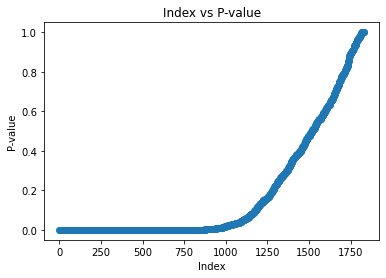

In [97]:
#plot it 
plt.scatter(range(1830), sorteddf['pvalue'])
plt.xlabel('Index')
plt.ylabel('P-value')
plt.title('Index vs P-value')
plt.show()

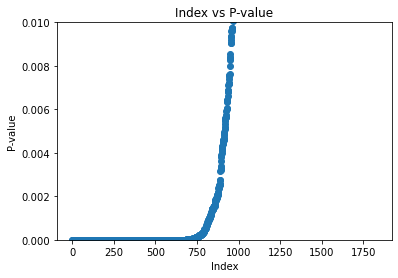

In [102]:
#plot a zoomed-in version of it 
plt.scatter(range(1830), sorteddf['pvalue'])
plt.xlabel('Index')
plt.ylabel('P-value')
plt.title('Index vs P-value')
plt.ylim(0, 0.01)
plt.show()

WHat are the top 10 variables at any separation?
What variables are anywhere in the top 100?
What variables are good at all 3 separations?

In [134]:
#top 10 at anything:
featlist1 = sorteddf[0:10]['feature'].tolist()
featlist1

['mfccs_mean_2',
 'chroma08_2',
 'mfccs_std_2',
 'maxpf',
 'chroma09_2',
 'maxpf_short_2',
 'chroma06_3',
 'chroma10_1',
 'chroma07_3',
 'mfccs_mean_4']

In [137]:
#all in top 100:
featlist2 = sorteddf['feature'][0:100].unique().tolist()
print(featlist2, len(featlist2))

['mfccs_mean_2', 'chroma08_2', 'mfccs_std_2', 'maxpf', 'chroma09_2', 'maxpf_short_2', 'chroma06_3', 'chroma10_1', 'chroma07_3', 'mfccs_mean_4', 'chroma07_2', 'maxpf_short_3', 'chroma11_1', 'chroma07_4', 'chroma08_3', 'chroma06_4', 'f0', 'maxpf_short_1', 'chroma05_3', 'maxf_items', 'chroma05_4', 'chroma07_1_diff', 'chroma10_2', 'mfccs_mean_0', 'f0_short_2', 'median_spectral_envelope', 'maxf_items_short_2', 'bwfourier', 'minf_items_short_2', 'chroma06_2', 'minf_items', 'chroma08_4', 'chroma06_1_diff', 'maxpf_short_4', 'chroma09_1', 'f0_short_3', 'chroma08_1_diff', 'mfccs_mean_6', 'maxptf_short_4', 'chroma10_0_diff', 'chroma02_1_diff', 'maxf_items_short_3', 'minf_items_short_3', 'mfccs_std_3', 'mfccs_mean_5', 'min_spectral_envelope', 'mfccs_std_8', 'bwfourier_short_2', 'chroma09_3', 'mfccs_std_5', 'maxpf_short_0', 'chroma03_1_diff', 'chroma09_4', 'mfccs_mean_3', 'chroma04_4', 'mfccs_std_12', 'chroma07_1_grad', 'chroma12_1', 'chroma01_1', 'mfccs_std_11', 'meancent_short_1', 'maxf_items_sho

In [138]:
#add all of the p-values for the 3 different separations
grouped_df = sorteddf.groupby('feature').sum()

#find the best 100 of these
sortedgroup = grouped_df.sort_values(by='pvalue')

#featlist3 = 
featlist3 = sortedgroup.head(50).iloc[:, 0].index.tolist()
print(featlist3)

['chroma07_3', 'chroma06_3', 'f0_short_2', 'chroma09_2', 'mfccs_std_2', 'chroma08_2', 'chroma08_3', 'chroma06_4', 'chroma11_1', 'chroma05_4', 'chroma07_2', 'chroma07_4', 'chroma05_3', 'chroma06_2', 'chroma10_2', 'f0', 'chroma04_4', 'mfccs_std_11', 'min_amp_short_2', 'chroma02_1_diff', 'time_from_peak_to_end', 'f0_short_3', 'chroma03_1_diff', 'chroma12_0', 'min_spectral_envelope', 'chroma12_1_diff', 'mfccs_mean_3', 'minf_items_short_2', 'mfccs_mean_6', 'mfccs_mean_2', 'f0_short_1', 'magmax_short_1', 'n2_short_1_diff', 'chroma09_3', 'chroma08_1', 'chroma01_1', 'chroma10_0_diff', 'chroma02_1_grad', 'minf_items_short_1', 'chroma07_1_diff', 'chroma01_2_diff', 'mfccs_mean_0', 'magmax_short_4', 'chroma08_4', 'chroma10_1', 'chroma12_4', 'chroma05_1_diff', 'mfccs_mean_5', 'chroma07_0_grad', 'chroma09_1_grad']


In [139]:
mergedlist = list(set(featlist1 + featlist2 + featlist3))

In [140]:
print(mergedlist)

['bwfourier_short_3', 'chroma01_1', 'chroma03_1_diff', 'magmax_short_1', 'zcr_mean', 'mfccs_mean_5', 'chroma11_1', 'chroma10_1', 'chroma12_0', 'maxf_items_short_2', 'chroma12_1', 'chroma12_1_diff', 'chroma05_1_diff', 'chroma07_1_diff', 'maxpf_short_3', 'maxpf', 'chroma09_1_grad', 'chroma09_0_diff', 'chroma06_2', 'maxpf_short_4', 'minf_items', 'chroma02_1_diff', 'chroma05_3', 'chroma04_4', 'chroma02_1', 'chroma06_1_grad', 'chroma05_4', 'mfccs_std_2', 'bwfourier_short_1', 'f0_short_3', 'magmax_short_4', 'chroma10_2', 'mfccs_std_3', 'chroma09_2', 'chroma06_3', 'max_amp', 'mfccs_std_12', 'mfccs_mean_6', 'mfccs_mean_4', 'chroma08_3', 'mfccs_mean_2', 'chroma08_4', 'chroma09_4', 'n2_short_1_diff', 'f0_short_2', 'mfccs_std_11', 'maxf_items_short_1', 'mfccs_mean_0', 'bwfourier', 'minf_items_short_1', 'meancent_short_1', 'mfccs_std_5', 'chroma01_2_diff', 'minf_items_short_3', 'minf_items_short_4', 'chroma07_4', 'maxf_items_short_3', 'mfccs_std_8', 'chroma08_1', 'median_spectral_envelope', 'time_